In [1]:
from Type_simulation import *
from Benchmark import *

# Benchmarks

Le raccourci ramène en dessous du bench

* [Linéaire logistique](#lineaire)
    * [coef_tt = 1.1 (constant)](#lconstant)
        * [1 modèle sans poids](#lc1mod)
        * [1 modèle avec poids](#lc1modw)
        * [2 modèles avec poids](#lc2modw)
        * [Comparaison](#lcbench)
    * [coef_tt = 1 * std(XB)](#lnconstant)
        * [1 modèle sans poids](#lnc1mod)
        * [1 modèle avec poids](#lnc1modw)
        * [2 modèles avec poids](#lnc2modw)
        * [Comparaison](#lncbench)
* [Linéaire + intéraction](#interaction)
    * [coef_tt = 1.1 (constant)](#intconstant)
        * [1 modèle sans poids](#intc1mod)
        * [1 modèle avec poids](#intc1modw)
        * [2 modèles avec poids](#intc2modw)
        * [Comparaison](#intcbench)
    * [coef_tt = 1 * std(XB)](#intnconstant)
        * [1 modèle sans poids](#intnc1mod)
        * [1 modèle avec poids](#intnc1modw)
        * [2 modèles avec poids](#intnc2modw)
        * [Comparaison](#intncbench)
* [Non linéaire](#nlineaire)
    * [coef_tt = 1 * std(XB)](#nlnconstant)
        * [1 modèle sans poids](#nlnc1mod)
        * [1 modèle avec poids](#nlnc1modw)
        * [2 modèles avec poids](#nlnc2modw)
        * [Comparaison](#nlncbench)

In [2]:
param_sim = {
    'n_features': 25,
    'n_classes': 2,
    'n_samples': 1000,
    'beta': [0.1, 0.1, 0.3],
    'coef_tt': 1.1,
    'rho': 15
}
idx = np.arange(param_sim['n_features'])
param_sim['beta'] = (-1) ** idx * np.exp(-idx / 20.)
param_sim['alpha'] = (-1) ** idx * np.exp(-idx / 20.) /3

w_values_bench = np.arange(0,8.,2)
w_values_graph = np.arange(0,8,0.1)

In [3]:
def benchmarking_graph_classcaus(nbr_model ,weight, function_type, coef_tt,
                                 coef_tt_const, function = None, pi = sigmoid):
    
    if nbr_model == 1:
        
        param_sim = {
        'n_features': 25,
        'n_classes': 2,
        'n_samples': 1000,
        'beta': [0.1, 0.1, 0.3],
        'coef_tt': coef_tt,
        'rho': 15
        }
        idx = np.arange(param_sim['n_features'])
        param_sim['beta'] = (-1) ** idx * np.exp(-idx / 20.)
        param_sim['alpha'] = (-1) ** idx * np.exp(-idx / 20.) /3
        
        
        params_classifcaus = {
        "encoded_features": 25,
        "alpha_wass": 0.01,
        "batch_size": 128,
        "epochs": 30,
        "lr": 0.001,
        "patience": 7,
        }

        w_values = np.arange(0,8,0.4)
        list_WD = []

        list_pehe_rf = []
        list_pehe_xgb = []
        list_pehe_classcaus = []

        list_accu_sign_cate_rf = []
        list_accu_sign_cate_xgb = []
        list_accu_sign_cate_classcaus = []


        for w in w_values:
            simu = Simulation_mod(param_sim)
            simu.simule(wd_para=w, function_type= function_type , coef_tt_const=coef_tt_const , function=function, pi=pi)
            bench_one = Benchmark(simu)
            bench_one.prep_bench()
    
            WD = simu.wd
            list_WD.append(WD)
    
            rf_model = RandomForestRegressor()
            xgb_model = xgb.XGBRegressor()
            classcaus_model = Classcaus(simu, params_classifcaus)

            bench_one.benchmark_one_model(model = rf_model, type_model= "regressor", name_model="RF",weight=weight)
            list_pehe_rf.append(bench_one.PEHE)
            list_accu_sign_cate_rf.append(bench_one.accu_sign_cate)
    
            bench_one.benchmark_one_model(model = xgb_model, type_model= "regressor",name_model="xgb", weight=weight)
            list_pehe_xgb.append(bench_one.PEHE)
            list_accu_sign_cate_xgb.append(bench_one.accu_sign_cate)
    
            bench_one.benchmark_one_model(model = classcaus_model, type_model= "classcaus", name_model="classcaus", weight=weight)
            list_pehe_classcaus.append(bench_one.PEHE)
            list_accu_sign_cate_classcaus.append(bench_one.accu_sign_cate)
            
    elif nbr_model == 2:
            
        param_sim = {
        'n_features': 25,
        'n_classes': 2,
        'n_samples': 1000,
        'beta': [0.1, 0.1, 0.3],
        'coef_tt': coef_tt,
        'rho': 15
        }
        idx = np.arange(param_sim['n_features'])
        param_sim['beta'] = (-1) ** idx * np.exp(-idx / 20.)
        param_sim['alpha'] = (-1) ** idx * np.exp(-idx / 20.) /3
        
        params_classifcaus = {
        "encoded_features": 25,
        "alpha_wass": 0.01,
        "batch_size": 1000,
        "epochs": 30,
        "lr": 0.001,
        "patience": 7,
        }

        w_values = np.arange(0,8,0.4)
        list_WD = []

        list_pehe_rf = []
        list_pehe_xgb = []
        list_pehe_classcaus = []

        list_accu_sign_cate_rf = []
        list_accu_sign_cate_xgb = []
        list_accu_sign_cate_classcaus = []

        for w in w_values:
            simu = Simulation_mod(param_sim)
            simu.simule(wd_para=w, function_type= function_type , coef_tt_const=coef_tt_const , function=function, pi=pi)
            bench_two = Benchmark(simu)
            bench_two.prep_bench()
    
            WD = simu.wd
            list_WD.append(WD)
    
            rf_model_0 = RandomForestRegressor()
            xgb_model_0 = xgb.XGBRegressor()
            classcaus_model_0 = Classcaus(simu, params_classifcaus)

            rf_model_1 = RandomForestRegressor()
            xgb_model_1 = xgb.XGBRegressor()
            classcaus_model_1 = Classcaus(simu, params_classifcaus)


            bench_two.benchmark_two_models(model0 = rf_model_0, model1=rf_model_1, type_model= "regressor", name_models="RF",weight=weight)
            list_pehe_rf.append(bench_two.PEHE)
            list_accu_sign_cate_rf.append(bench_two.accu_sign_cate)
    
            bench_two.benchmark_two_models(model0 = xgb_model_0, model1 = xgb_model_1, type_model= "regressor",name_models="xgb", weight=weight)
            list_pehe_xgb.append(bench_two.PEHE)
            list_accu_sign_cate_xgb.append(bench_two.accu_sign_cate)
    
            bench_two.benchmark_two_models(model0 = classcaus_model_0, model1 = classcaus_model_1, type_model= "classcaus", name_models="classcaus", weight=weight)
            list_pehe_classcaus.append(bench_two.PEHE)
            list_accu_sign_cate_classcaus.append(bench_two.accu_sign_cate)
            
            
    plt.figure(figsize=(16,8))

    plt.subplot(1,2,1)

    plt.plot(list_WD, list_pehe_rf,"o", color="blue", label="RF")
    plt.plot(list_WD, list_pehe_xgb,"o", color="red", label="XGB")
    plt.plot(list_WD, list_pehe_classcaus,"o", color="green", label="classcaus")
    plt.xlabel("Wasserstein distance")
    plt.ylabel("PEHE")
    plt.title("PEHE en fonction de WD")
    plt.legend()

    plt.subplot(1,2,2)

    plt.plot(list_WD, list_accu_sign_cate_rf,"o", color="blue", label="RF")
    plt.plot(list_WD, list_accu_sign_cate_xgb,"o", color="red", label="XGB")
    plt.plot(list_WD, list_accu_sign_cate_classcaus,"o", color="green", label="classcaus")

    plt.xlabel("Wasserstein distance")
    plt.ylabel("accuracy sign cate")
    plt.title("accuracy signe de la CATE en fonction de WD")
    plt.legend()

    plt.show()

In [4]:
def benchmarking_table_classcaus(function_type , coef_tt , coef_tt_const, function = None, pi= sigmoid):
    
    param_sim = {
    'n_features': 25,
    'n_classes': 2,
    'n_samples': 1000,
    'beta': [0.1, 0.1, 0.3],
    'coef_tt': coef_tt,
    'rho': 15
    }
    idx = np.arange(param_sim['n_features'])
    param_sim['beta'] = (-1) ** idx * np.exp(-idx / 20.)
    param_sim['alpha'] = (-1) ** idx * np.exp(-idx / 20.) /3
    
    params_classifcaus = {
    "encoded_features": 25,
    "alpha_wass": 0.01,
    "batch_size": 128,
    "epochs": 30,
    "lr": 0.001,
    "patience": 7,
    }

    simu = Simulation_mod(param_sim)

    for w in np.arange(0,8.,2):
        simu.simule(wd_para=w, function_type= function_type , coef_tt_const= coef_tt_const, function = function , pi=sigmoid)
        bench_one = Benchmark(simu)
        bench_one.prep_bench()
    
        rf_model = RandomForestRegressor()
        xgb_model = xgb.XGBRegressor()
        classcaus_model = Classcaus(simu, params_classifcaus)
    
        rf_bench = bench_one.benchmark_one_model(model = rf_model, type_model= "regressor", name_model="RF",weight=False)
        xgb_bench = bench_one.benchmark_one_model(model = xgb_model, type_model= "regressor",name_model="xgb", weight=False)
        classcaus_bench = bench_one.benchmark_one_model(model = classcaus_model, type_model= "classcaus", name_model="classcaus", weight=False)
        benchmark = pd.concat([rf_bench,xgb_bench,classcaus_bench])
    
        print(f"Pour WD = {simu.wd} (wd_para = {simu.wd_para}) \n")
    
        print("Pour 1 modèle sans poids")
        benchmark_1 = pd.concat([rf_bench,xgb_bench,classcaus_bench])
        print(benchmark, "\n")
    
        rf_model = RandomForestRegressor()
        xgb_model = xgb.XGBRegressor()
        classcaus_model = Classcaus(simu, params_classifcaus)
    
        rf_bench = bench_one.benchmark_one_model(model = rf_model, type_model= "regressor", name_model="RF",weight=True)
        xgb_bench = bench_one.benchmark_one_model(model = xgb_model, type_model= "regressor",name_model="xgb", weight=True)
        classcaus_bench = bench_one.benchmark_one_model(model = classcaus_model, type_model= "classcaus", name_model="classcaus", weight=True)
        benchmark = pd.concat([rf_bench,xgb_bench,classcaus_bench])
    
        print("Pour 1 modèle avec poids")
        benchmark_1 = pd.concat([rf_bench,xgb_bench,classcaus_bench])
        print(benchmark, "\n")
    
        rf_model_0 = RandomForestRegressor()
        xgb_model_0 = xgb.XGBRegressor()
        classcaus_model_0 = Classcaus(simu, params_classifcaus)

        rf_model_1 = RandomForestRegressor()
        xgb_model_1 = xgb.XGBRegressor()
        classcaus_model_1 = Classcaus(simu, params_classifcaus)
    
        rf_bench = bench_one.benchmark_two_models(model0 = rf_model_0, model1=rf_model_1, type_model= "regressor", name_models="RF",weight=True)
        xgb_bench = bench_one.benchmark_two_models(model0 = xgb_model_0, model1=xgb_model_1, type_model= "regressor", name_models="xgb",weight=True)
        classcaus_bench = bench_one.benchmark_two_models(model0 = classcaus_model_0, model1=classcaus_model_1, type_model= "classcaus", name_models="classcaus",weight=True)
        benchmark = pd.concat([rf_bench,xgb_bench,classcaus_bench])
    
        print("Pour 2 modèles avec poids")
        benchmark_1 = pd.concat([rf_bench,xgb_bench,classcaus_bench])
        print(benchmark, "\n")

## Linéaire logistique   <a class="anchor" id="lineaire"></a>

## $ Y_i \sim \mathcal{\beta}( \sigma (X\beta + \gamma t))$ avec $\sigma = sigmoid$

### $\gamma = 1.1$ (constant) <a class="anchor" id="lconstant"></a>

0:	[0s / 0s],		train_loss: 0.6925,	train_loss_classif: 0.6910,	train_loss_wass: 0.1507
1:	[0s / 0s],		train_loss: 0.6888,	train_loss_classif: 0.6877,	train_loss_wass: 0.1076
2:	[0s / 0s],		train_loss: 0.6849,	train_loss_classif: 0.6841,	train_loss_wass: 0.0844
3:	[0s / 0s],		train_loss: 0.6803,	train_loss_classif: 0.6795,	train_loss_wass: 0.0736
4:	[0s / 0s],		train_loss: 0.6703,	train_loss_classif: 0.6696,	train_loss_wass: 0.0697
5:	[0s / 0s],		train_loss: 0.6496,	train_loss_classif: 0.6487,	train_loss_wass: 0.0906
6:	[0s / 0s],		train_loss: 0.6000,	train_loss_classif: 0.5990,	train_loss_wass: 0.1056
0:	[0s / 0s],		train_loss: 0.6938,	train_loss_classif: 0.6922,	train_loss_wass: 0.1640
1:	[0s / 0s],		train_loss: 0.6899,	train_loss_classif: 0.6888,	train_loss_wass: 0.1141
2:	[0s / 0s],		train_loss: 0.6847,	train_loss_classif: 0.6837,	train_loss_wass: 0.1020
3:	[0s / 0s],		train_loss: 0.6738,	train_loss_classif: 0.6729,	train_loss_wass: 0.0941
4:	[0s / 0s],		train_loss: 0.6468,	train_lo

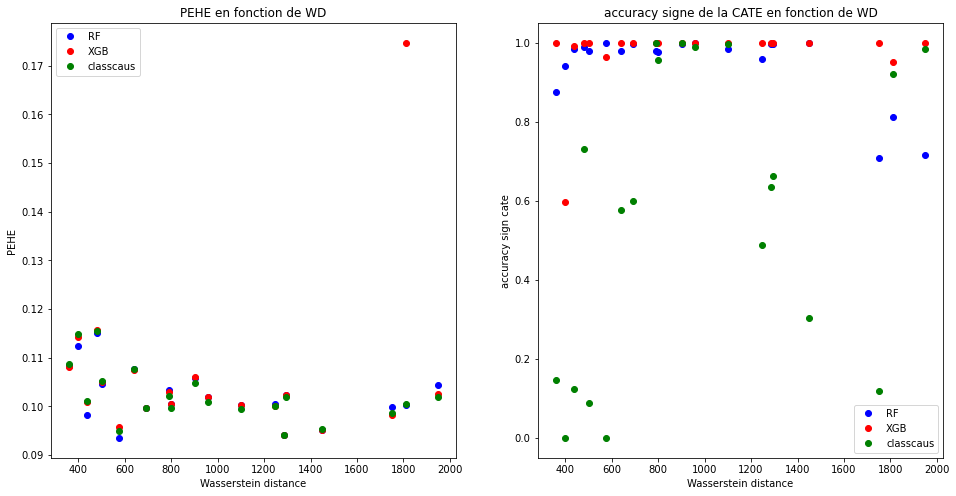

In [5]:
benchmarking_graph_classcaus(nbr_model= 1, weight= False, function_type="linear", coef_tt=1.1, coef_tt_const=True)

#### 1 modèle sans poids  <a class="anchor" id="lc1mod"></a>

0:	[0s / 0s],		train_loss: 0.6937,	train_loss_classif: 0.6920,	train_loss_wass: 0.1779
1:	[0s / 0s],		train_loss: 0.6897,	train_loss_classif: 0.6881,	train_loss_wass: 0.1505
2:	[0s / 0s],		train_loss: 0.6833,	train_loss_classif: 0.6821,	train_loss_wass: 0.1259
3:	[0s / 0s],		train_loss: 0.6664,	train_loss_classif: 0.6650,	train_loss_wass: 0.1393
4:	[0s / 0s],		train_loss: 0.6325,	train_loss_classif: 0.6308,	train_loss_wass: 0.1650
5:	[0s / 0s],		train_loss: 0.5860,	train_loss_classif: 0.5841,	train_loss_wass: 0.1810
6:	[0s / 0s],		train_loss: 0.5167,	train_loss_classif: 0.5147,	train_loss_wass: 0.1949
0:	[0s / 0s],		train_loss: 0.6936,	train_loss_classif: 0.6922,	train_loss_wass: 0.1469
1:	[0s / 0s],		train_loss: 0.6879,	train_loss_classif: 0.6868,	train_loss_wass: 0.1084
2:	[0s / 0s],		train_loss: 0.6820,	train_loss_classif: 0.6809,	train_loss_wass: 0.1018
3:	[0s / 0s],		train_loss: 0.6710,	train_loss_classif: 0.6699,	train_loss_wass: 0.1089
4:	[0s / 0s],		train_loss: 0.6427,	train_lo

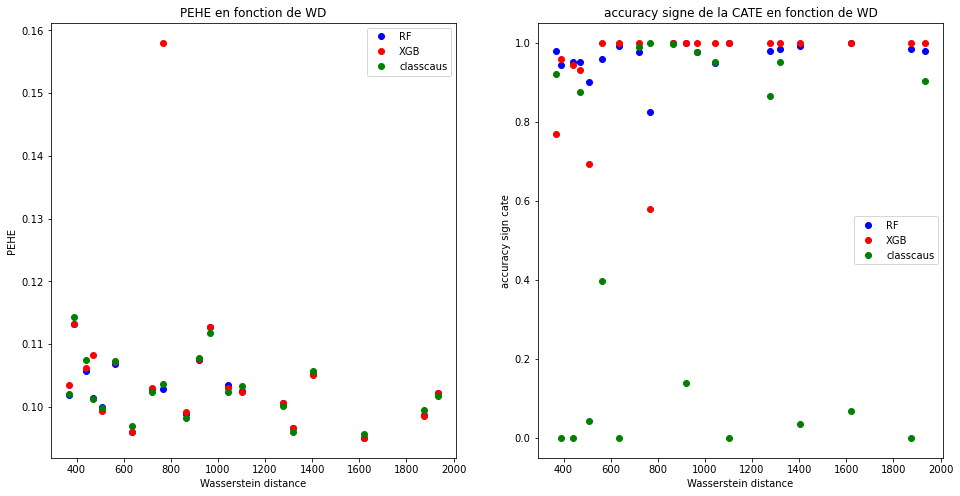

In [6]:
benchmarking_graph_classcaus(nbr_model= 1, weight= True, function_type="linear", coef_tt=1.1, coef_tt_const=True)

#### 1 modèle avec poids <a class="anchor" id="lc1modw"></a>

0:	[0s / 0s],		train_loss: 0.7062,	train_loss_classif: 0.6932,	train_loss_wass: 1.3080
1:	[0s / 0s],		train_loss: 0.7038,	train_loss_classif: 0.6928,	train_loss_wass: 1.0961
2:	[0s / 0s],		train_loss: 0.7018,	train_loss_classif: 0.6926,	train_loss_wass: 0.9236
3:	[0s / 0s],		train_loss: 0.7001,	train_loss_classif: 0.6923,	train_loss_wass: 0.7843
4:	[0s / 0s],		train_loss: 0.6988,	train_loss_classif: 0.6920,	train_loss_wass: 0.6727
5:	[0s / 0s],		train_loss: 0.6976,	train_loss_classif: 0.6917,	train_loss_wass: 0.5837
6:	[0s / 0s],		train_loss: 0.6965,	train_loss_classif: 0.6914,	train_loss_wass: 0.5136
0:	[0s / 0s],		train_loss: 0.6949,	train_loss_classif: 0.6892,	train_loss_wass: 0.5701
1:	[0s / 0s],		train_loss: 0.6901,	train_loss_classif: 0.6852,	train_loss_wass: 0.4952
2:	[0s / 0s],		train_loss: 0.6858,	train_loss_classif: 0.6815,	train_loss_wass: 0.4337
3:	[0s / 0s],		train_loss: 0.6821,	train_loss_classif: 0.6782,	train_loss_wass: 0.3842
4:	[0s / 0s],		train_loss: 0.6787,	train_lo

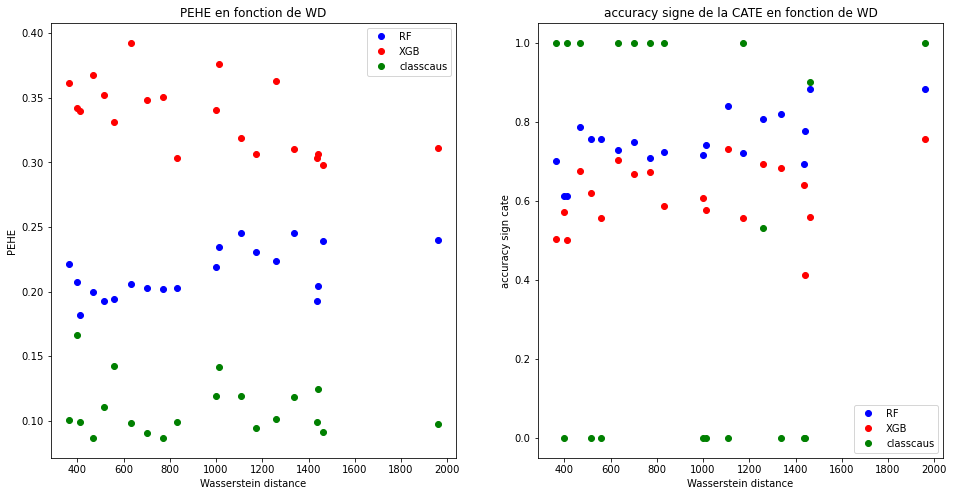

In [7]:
benchmarking_graph_classcaus(nbr_model= 2, weight= True, function_type="linear", coef_tt=1.1, coef_tt_const=True)

#### 2 modèles avec poids  <a class="anchor" id="lc2modw"></a>

In [8]:
benchmarking_table_classcaus(function_type = "linear", coef_tt = 1.1, coef_tt_const = True)

0:	[0s / 0s],		train_loss: 0.6940,	train_loss_classif: 0.6921,	train_loss_wass: 0.1906
1:	[0s / 0s],		train_loss: 0.6899,	train_loss_classif: 0.6886,	train_loss_wass: 0.1373
2:	[0s / 0s],		train_loss: 0.6884,	train_loss_classif: 0.6873,	train_loss_wass: 0.1104
3:	[0s / 0s],		train_loss: 0.6861,	train_loss_classif: 0.6852,	train_loss_wass: 0.0963
4:	[0s / 0s],		train_loss: 0.6817,	train_loss_classif: 0.6809,	train_loss_wass: 0.0760
5:	[0s / 0s],		train_loss: 0.6760,	train_loss_classif: 0.6751,	train_loss_wass: 0.0839
6:	[0s / 0s],		train_loss: 0.6594,	train_loss_classif: 0.6584,	train_loss_wass: 0.1010
Pour WD = 362.651123046875 (wd_para = 0.0) 

Pour 1 modèle sans poids
           accu_0  accu_1    MSE_p0    MSE_p1      PEHE  accu_sign_cate
RF          0.676   0.660  0.148276  0.151516  0.101680           0.888
xgb         0.652   0.632  0.162256  0.164274  0.112715           0.908
classcaus   0.520   0.460  0.194392  0.201214  0.102870           0.000 

0:	[0s / 0s],		train_loss: 0.69

#### Comparaison  <a class="anchor" id="lcbench"></a>

### $\gamma = 1*std(XB)$  <a class="anchor" id="lnconstant"></a>

0:	[0s / 0s],		train_loss: 0.6919,	train_loss_classif: 0.6904,	train_loss_wass: 0.1519
1:	[0s / 0s],		train_loss: 0.6577,	train_loss_classif: 0.6565,	train_loss_wass: 0.1241
2:	[0s / 0s],		train_loss: 0.6223,	train_loss_classif: 0.6212,	train_loss_wass: 0.1131
3:	[0s / 0s],		train_loss: 0.5931,	train_loss_classif: 0.5919,	train_loss_wass: 0.1128
4:	[0s / 0s],		train_loss: 0.5701,	train_loss_classif: 0.5688,	train_loss_wass: 0.1280
5:	[0s / 0s],		train_loss: 0.5415,	train_loss_classif: 0.5402,	train_loss_wass: 0.1332
6:	[0s / 0s],		train_loss: 0.5116,	train_loss_classif: 0.5102,	train_loss_wass: 0.1332
0:	[0s / 0s],		train_loss: 0.6782,	train_loss_classif: 0.6764,	train_loss_wass: 0.1753
1:	[0s / 0s],		train_loss: 0.6421,	train_loss_classif: 0.6400,	train_loss_wass: 0.2158
2:	[0s / 0s],		train_loss: 0.5985,	train_loss_classif: 0.5955,	train_loss_wass: 0.2997
3:	[0s / 0s],		train_loss: 0.5752,	train_loss_classif: 0.5713,	train_loss_wass: 0.3841
4:	[0s / 0s],		train_loss: 0.5481,	train_lo

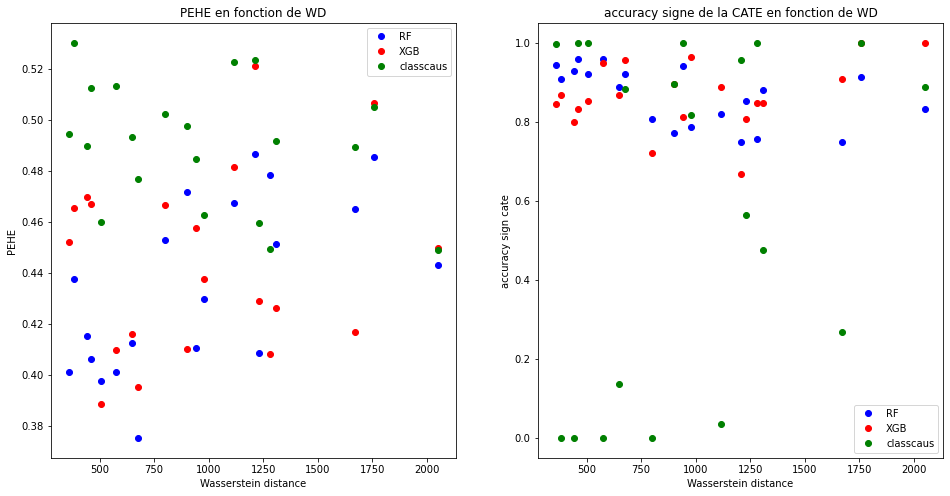

In [9]:
benchmarking_graph_classcaus(nbr_model= 1, weight= False, function_type="linear", coef_tt=1, coef_tt_const=False)

#### 1 modèle sans poids  <a class="anchor" id="lnc1mod"></a>

0:	[0s / 0s],		train_loss: 0.6739,	train_loss_classif: 0.6724,	train_loss_wass: 0.1496
1:	[0s / 0s],		train_loss: 0.6545,	train_loss_classif: 0.6532,	train_loss_wass: 0.1248
2:	[0s / 0s],		train_loss: 0.6280,	train_loss_classif: 0.6267,	train_loss_wass: 0.1309
3:	[0s / 0s],		train_loss: 0.5880,	train_loss_classif: 0.5864,	train_loss_wass: 0.1619
4:	[0s / 0s],		train_loss: 0.5428,	train_loss_classif: 0.5408,	train_loss_wass: 0.1952
5:	[0s / 0s],		train_loss: 0.4907,	train_loss_classif: 0.4883,	train_loss_wass: 0.2386
6:	[0s / 0s],		train_loss: 0.4370,	train_loss_classif: 0.4345,	train_loss_wass: 0.2497
0:	[0s / 0s],		train_loss: 0.6991,	train_loss_classif: 0.6969,	train_loss_wass: 0.2258
1:	[0s / 0s],		train_loss: 0.6652,	train_loss_classif: 0.6632,	train_loss_wass: 0.2038
2:	[0s / 0s],		train_loss: 0.6218,	train_loss_classif: 0.6195,	train_loss_wass: 0.2372
3:	[0s / 0s],		train_loss: 0.5963,	train_loss_classif: 0.5928,	train_loss_wass: 0.3502
4:	[0s / 0s],		train_loss: 0.5683,	train_lo

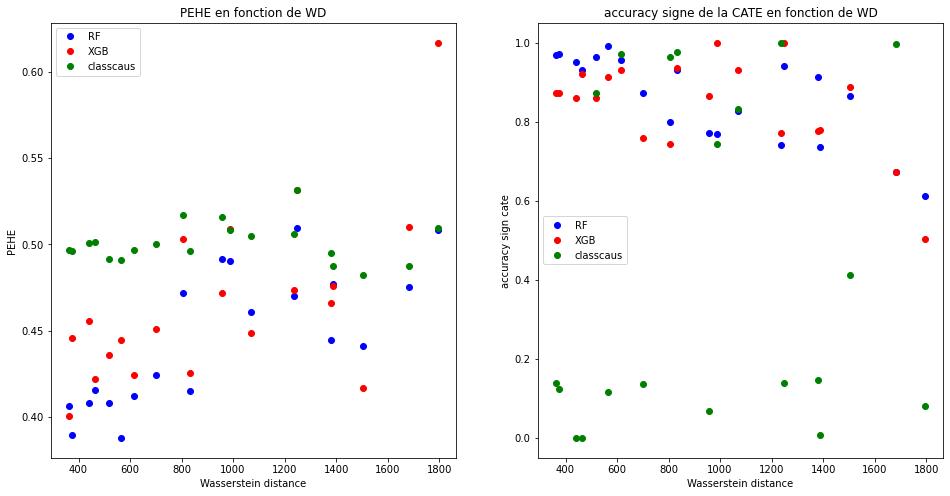

In [10]:
benchmarking_graph_classcaus(nbr_model= 1, weight= True, function_type="linear", coef_tt=1, coef_tt_const=False)

#### 1 modèle avec poids  <a class="anchor" id="lnc1modw"></a>

0:	[0s / 0s],		train_loss: 0.7064,	train_loss_classif: 0.6890,	train_loss_wass: 1.7438
1:	[0s / 0s],		train_loss: 0.7027,	train_loss_classif: 0.6880,	train_loss_wass: 1.4764
2:	[0s / 0s],		train_loss: 0.6997,	train_loss_classif: 0.6872,	train_loss_wass: 1.2535
3:	[0s / 0s],		train_loss: 0.6972,	train_loss_classif: 0.6865,	train_loss_wass: 1.0685
4:	[0s / 0s],		train_loss: 0.6951,	train_loss_classif: 0.6860,	train_loss_wass: 0.9162
5:	[0s / 0s],		train_loss: 0.6935,	train_loss_classif: 0.6856,	train_loss_wass: 0.7914
6:	[0s / 0s],		train_loss: 0.6920,	train_loss_classif: 0.6851,	train_loss_wass: 0.6890
0:	[0s / 0s],		train_loss: 0.6556,	train_loss_classif: 0.6504,	train_loss_wass: 0.5228
1:	[0s / 0s],		train_loss: 0.6484,	train_loss_classif: 0.6437,	train_loss_wass: 0.4666
2:	[0s / 0s],		train_loss: 0.6418,	train_loss_classif: 0.6376,	train_loss_wass: 0.4190
3:	[0s / 0s],		train_loss: 0.6351,	train_loss_classif: 0.6313,	train_loss_wass: 0.3809
4:	[0s / 0s],		train_loss: 0.6282,	train_lo

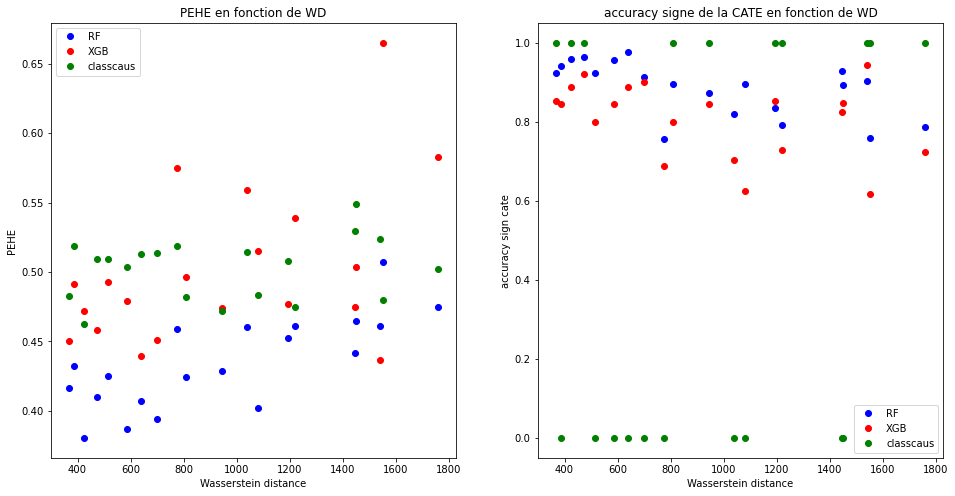

In [11]:
benchmarking_graph_classcaus(nbr_model= 2, weight= True, function_type="linear", coef_tt=1, coef_tt_const=False)

#### 2 modèles avec poids  <a class="anchor" id="lnc2modw"></a>

In [12]:
benchmarking_table_classcaus(function_type = "linear", coef_tt = 1, coef_tt_const = False)

0:	[0s / 0s],		train_loss: 0.6954,	train_loss_classif: 0.6943,	train_loss_wass: 0.1074
1:	[0s / 0s],		train_loss: 0.6680,	train_loss_classif: 0.6671,	train_loss_wass: 0.0872
2:	[0s / 0s],		train_loss: 0.6264,	train_loss_classif: 0.6255,	train_loss_wass: 0.0938
3:	[0s / 0s],		train_loss: 0.5836,	train_loss_classif: 0.5823,	train_loss_wass: 0.1306
4:	[0s / 0s],		train_loss: 0.5705,	train_loss_classif: 0.5689,	train_loss_wass: 0.1559
5:	[0s / 0s],		train_loss: 0.5498,	train_loss_classif: 0.5483,	train_loss_wass: 0.1536
6:	[0s / 0s],		train_loss: 0.5294,	train_loss_classif: 0.5275,	train_loss_wass: 0.1856
Pour WD = 360.67864990234375 (wd_para = 0.0) 

Pour 1 modèle sans poids
           accu_0  accu_1    MSE_p0    MSE_p1      PEHE  accu_sign_cate
RF          0.668   0.808  0.155366  0.114557  0.398040           0.904
xgb         0.660   0.804  0.188187  0.117552  0.431502           0.832
classcaus   0.504   0.184  0.198517  0.222723  0.478045           1.000 

0:	[0s / 0s],		train_loss: 0.

#### Comparaison  <a class="anchor" id="lncbench"></a>

## Linéaire intéraction  <a class="anchor" id="interaction"></a>

## $ Y_i \sim \mathcal{\beta}( \sigma (X\beta + \gamma t + \alpha X t))$ avec $\sigma = sigmoid$   et  $\alpha = \frac{\beta}{3}  $

### $\gamma = 1.1$ (constant) <a class="anchor" id="intconstant"></a>

0:	[0s / 0s],		train_loss: 0.6897,	train_loss_classif: 0.6882,	train_loss_wass: 0.1475
1:	[0s / 0s],		train_loss: 0.6870,	train_loss_classif: 0.6858,	train_loss_wass: 0.1216
2:	[0s / 0s],		train_loss: 0.6823,	train_loss_classif: 0.6813,	train_loss_wass: 0.1038
3:	[0s / 0s],		train_loss: 0.6728,	train_loss_classif: 0.6717,	train_loss_wass: 0.1124
4:	[0s / 0s],		train_loss: 0.6483,	train_loss_classif: 0.6472,	train_loss_wass: 0.1092
5:	[0s / 0s],		train_loss: 0.5957,	train_loss_classif: 0.5944,	train_loss_wass: 0.1310
6:	[0s / 0s],		train_loss: 0.4949,	train_loss_classif: 0.4932,	train_loss_wass: 0.1709
0:	[0s / 0s],		train_loss: 0.6955,	train_loss_classif: 0.6931,	train_loss_wass: 0.2485
1:	[0s / 0s],		train_loss: 0.6913,	train_loss_classif: 0.6893,	train_loss_wass: 0.2054
2:	[0s / 0s],		train_loss: 0.6866,	train_loss_classif: 0.6848,	train_loss_wass: 0.1849
3:	[0s / 0s],		train_loss: 0.6764,	train_loss_classif: 0.6746,	train_loss_wass: 0.1809
4:	[0s / 0s],		train_loss: 0.6585,	train_lo

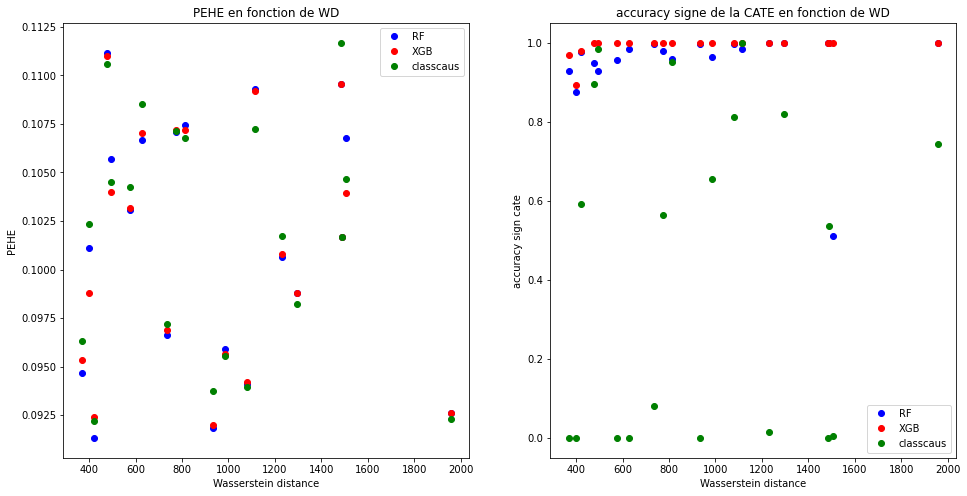

In [13]:
benchmarking_graph_classcaus(nbr_model= 1, weight= False, function_type="interaction", coef_tt=1.1, coef_tt_const=True)

#### 1 modèle sans poids  <a class="anchor" id="intc1mod"></a>

0:	[0s / 0s],		train_loss: 0.6932,	train_loss_classif: 0.6913,	train_loss_wass: 0.1865
1:	[0s / 0s],		train_loss: 0.6903,	train_loss_classif: 0.6888,	train_loss_wass: 0.1505
2:	[0s / 0s],		train_loss: 0.6869,	train_loss_classif: 0.6855,	train_loss_wass: 0.1335
3:	[0s / 0s],		train_loss: 0.6807,	train_loss_classif: 0.6793,	train_loss_wass: 0.1362
4:	[0s / 0s],		train_loss: 0.6660,	train_loss_classif: 0.6646,	train_loss_wass: 0.1425
5:	[0s / 0s],		train_loss: 0.6285,	train_loss_classif: 0.6269,	train_loss_wass: 0.1592
6:	[0s / 0s],		train_loss: 0.5505,	train_loss_classif: 0.5485,	train_loss_wass: 0.1973
0:	[0s / 0s],		train_loss: 0.6947,	train_loss_classif: 0.6926,	train_loss_wass: 0.2076
1:	[0s / 0s],		train_loss: 0.6924,	train_loss_classif: 0.6909,	train_loss_wass: 0.1532
2:	[0s / 0s],		train_loss: 0.6897,	train_loss_classif: 0.6884,	train_loss_wass: 0.1251
3:	[0s / 0s],		train_loss: 0.6836,	train_loss_classif: 0.6825,	train_loss_wass: 0.1077
4:	[0s / 0s],		train_loss: 0.6713,	train_lo

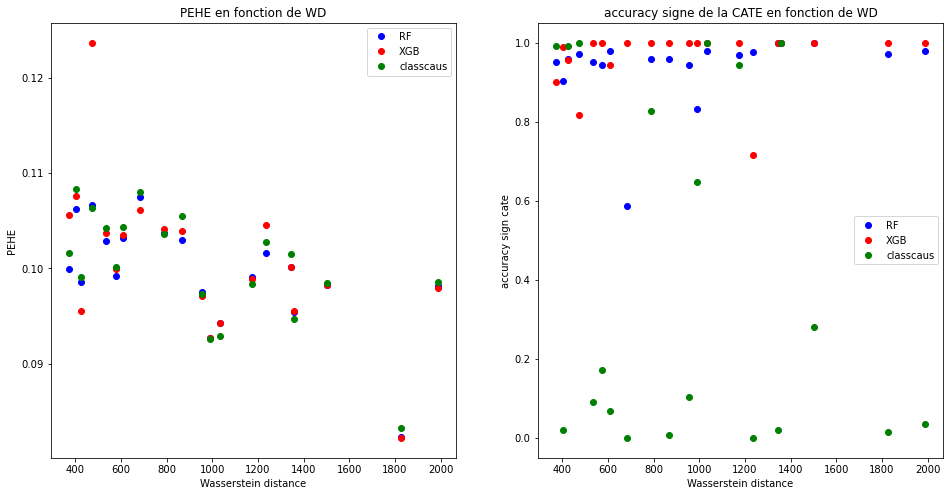

In [14]:
benchmarking_graph_classcaus(nbr_model= 1, weight= True, function_type="interaction", coef_tt=1.1, coef_tt_const=True)

#### 1 modèle avec poids  <a class="anchor" id="intc1modw"></a>

0:	[0s / 0s],		train_loss: 0.7141,	train_loss_classif: 0.7016,	train_loss_wass: 1.2569
1:	[0s / 0s],		train_loss: 0.7099,	train_loss_classif: 0.6991,	train_loss_wass: 1.0881
2:	[0s / 0s],		train_loss: 0.7065,	train_loss_classif: 0.6970,	train_loss_wass: 0.9462
3:	[0s / 0s],		train_loss: 0.7037,	train_loss_classif: 0.6954,	train_loss_wass: 0.8273
4:	[0s / 0s],		train_loss: 0.7014,	train_loss_classif: 0.6941,	train_loss_wass: 0.7278
5:	[0s / 0s],		train_loss: 0.6995,	train_loss_classif: 0.6930,	train_loss_wass: 0.6446
6:	[0s / 0s],		train_loss: 0.6978,	train_loss_classif: 0.6920,	train_loss_wass: 0.5750
0:	[0s / 0s],		train_loss: 0.7007,	train_loss_classif: 0.6871,	train_loss_wass: 1.3584
1:	[0s / 0s],		train_loss: 0.6975,	train_loss_classif: 0.6858,	train_loss_wass: 1.1699
2:	[0s / 0s],		train_loss: 0.6949,	train_loss_classif: 0.6848,	train_loss_wass: 1.0115
3:	[0s / 0s],		train_loss: 0.6928,	train_loss_classif: 0.6841,	train_loss_wass: 0.8793
4:	[0s / 0s],		train_loss: 0.6911,	train_lo

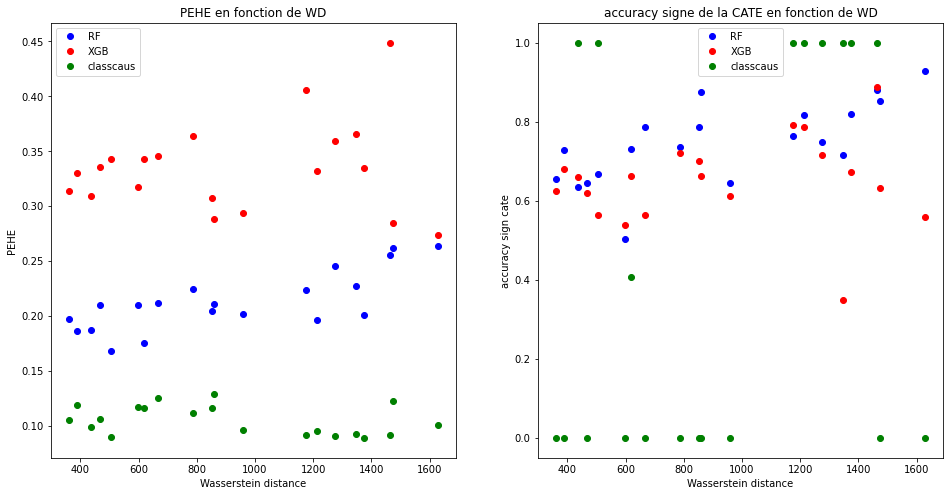

In [15]:
benchmarking_graph_classcaus(nbr_model= 2, weight= True, function_type="interaction", coef_tt=1.1, coef_tt_const=True)

#### 2 modèles avec poids  <a class="anchor" id="intc2modw"></a>

In [16]:
benchmarking_table_classcaus(function_type = "interaction", coef_tt = 1.1, coef_tt_const = True)

0:	[0s / 0s],		train_loss: 0.6971,	train_loss_classif: 0.6955,	train_loss_wass: 0.1636
1:	[0s / 0s],		train_loss: 0.6841,	train_loss_classif: 0.6827,	train_loss_wass: 0.1445
2:	[0s / 0s],		train_loss: 0.6737,	train_loss_classif: 0.6723,	train_loss_wass: 0.1400
3:	[0s / 0s],		train_loss: 0.6573,	train_loss_classif: 0.6556,	train_loss_wass: 0.1667
4:	[0s / 0s],		train_loss: 0.6220,	train_loss_classif: 0.6203,	train_loss_wass: 0.1698
5:	[0s / 0s],		train_loss: 0.5709,	train_loss_classif: 0.5690,	train_loss_wass: 0.1884
6:	[0s / 0s],		train_loss: 0.5094,	train_loss_classif: 0.5073,	train_loss_wass: 0.2081
Pour WD = 361.7037353515625 (wd_para = 0.0) 

Pour 1 modèle sans poids
           accu_0  accu_1    MSE_p0    MSE_p1      PEHE  accu_sign_cate
RF          0.724   0.716  0.154397  0.152274  0.098402           0.912
xgb         0.696   0.692  0.156703  0.149610  0.100032           0.700
classcaus   0.428   0.416  0.201575  0.205509  0.101777           0.748 

0:	[0s / 0s],		train_loss: 0.6

#### Comparaison  <a class="anchor" id="intcbench"></a>

### $\gamma = std(XB)$    <a class="anchor" id="intnconstant"></a>

0:	[0s / 0s],		train_loss: 0.7138,	train_loss_classif: 0.7120,	train_loss_wass: 0.1835
1:	[0s / 0s],		train_loss: 0.6864,	train_loss_classif: 0.6846,	train_loss_wass: 0.1739
2:	[0s / 0s],		train_loss: 0.6429,	train_loss_classif: 0.6406,	train_loss_wass: 0.2289
3:	[0s / 0s],		train_loss: 0.5801,	train_loss_classif: 0.5776,	train_loss_wass: 0.2487
4:	[0s / 0s],		train_loss: 0.5500,	train_loss_classif: 0.5466,	train_loss_wass: 0.3413
5:	[0s / 0s],		train_loss: 0.5210,	train_loss_classif: 0.5171,	train_loss_wass: 0.3939
6:	[0s / 0s],		train_loss: 0.4851,	train_loss_classif: 0.4799,	train_loss_wass: 0.5212
0:	[0s / 0s],		train_loss: 0.6528,	train_loss_classif: 0.6509,	train_loss_wass: 0.1902
1:	[0s / 0s],		train_loss: 0.6102,	train_loss_classif: 0.6081,	train_loss_wass: 0.2062
2:	[0s / 0s],		train_loss: 0.5415,	train_loss_classif: 0.5388,	train_loss_wass: 0.2711
3:	[0s / 0s],		train_loss: 0.5031,	train_loss_classif: 0.4990,	train_loss_wass: 0.4039
4:	[0s / 0s],		train_loss: 0.4548,	train_lo

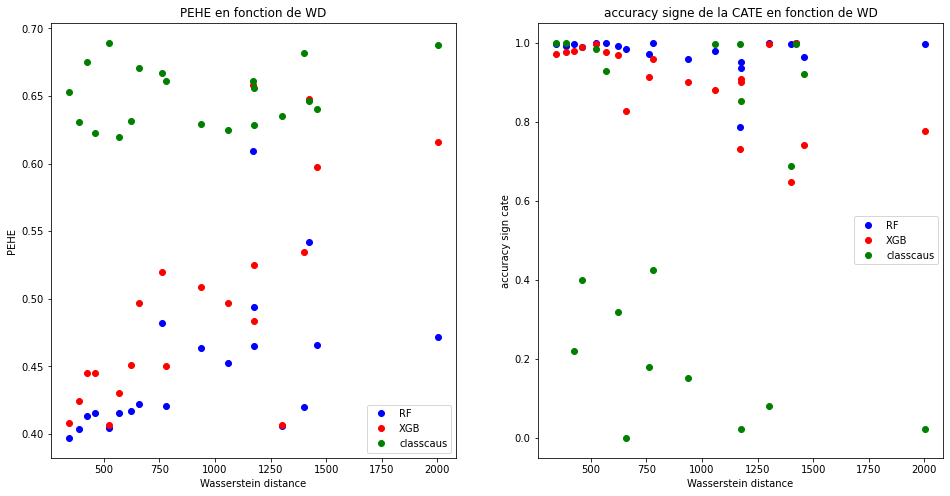

In [17]:
benchmarking_graph_classcaus(nbr_model= 1, weight= False, function_type="interaction", coef_tt=2, coef_tt_const=False)

#### 1 modèle sans poids  <a class="anchor" id="intnc1mod"></a>

0:	[0s / 0s],		train_loss: 0.7003,	train_loss_classif: 0.6986,	train_loss_wass: 0.1640
1:	[0s / 0s],		train_loss: 0.6293,	train_loss_classif: 0.6277,	train_loss_wass: 0.1603
2:	[0s / 0s],		train_loss: 0.5368,	train_loss_classif: 0.5347,	train_loss_wass: 0.2102
3:	[0s / 0s],		train_loss: 0.5051,	train_loss_classif: 0.5020,	train_loss_wass: 0.3085
4:	[0s / 0s],		train_loss: 0.4585,	train_loss_classif: 0.4552,	train_loss_wass: 0.3301
5:	[0s / 0s],		train_loss: 0.4232,	train_loss_classif: 0.4189,	train_loss_wass: 0.4269
6:	[0s / 1s],		train_loss: 0.3851,	train_loss_classif: 0.3784,	train_loss_wass: 0.6621
0:	[0s / 0s],		train_loss: 0.6866,	train_loss_classif: 0.6850,	train_loss_wass: 0.1601
1:	[0s / 0s],		train_loss: 0.6574,	train_loss_classif: 0.6559,	train_loss_wass: 0.1487
2:	[0s / 0s],		train_loss: 0.6075,	train_loss_classif: 0.6060,	train_loss_wass: 0.1466
3:	[0s / 0s],		train_loss: 0.5527,	train_loss_classif: 0.5510,	train_loss_wass: 0.1772
4:	[0s / 0s],		train_loss: 0.5090,	train_lo

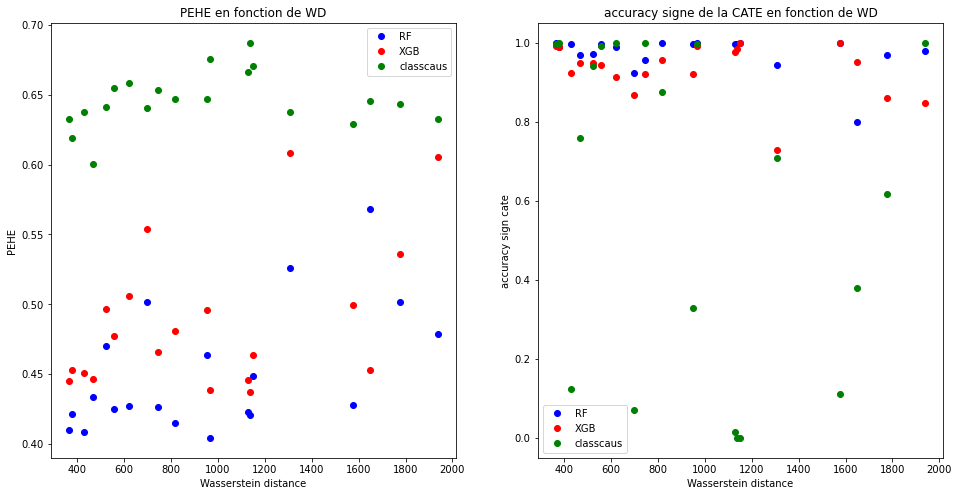

In [18]:
benchmarking_graph_classcaus(nbr_model= 1, weight= True, function_type="interaction", coef_tt=2, coef_tt_const=False)

#### 1 modèle avec poids  <a class="anchor" id="intnc1modw"></a>

0:	[0s / 0s],		train_loss: 0.7008,	train_loss_classif: 0.6925,	train_loss_wass: 0.8291
1:	[0s / 0s],		train_loss: 0.6992,	train_loss_classif: 0.6921,	train_loss_wass: 0.7107
2:	[0s / 0s],		train_loss: 0.6978,	train_loss_classif: 0.6917,	train_loss_wass: 0.6120
3:	[0s / 0s],		train_loss: 0.6965,	train_loss_classif: 0.6912,	train_loss_wass: 0.5305
4:	[0s / 0s],		train_loss: 0.6953,	train_loss_classif: 0.6907,	train_loss_wass: 0.4638
5:	[0s / 0s],		train_loss: 0.6941,	train_loss_classif: 0.6900,	train_loss_wass: 0.4098
6:	[0s / 0s],		train_loss: 0.6927,	train_loss_classif: 0.6891,	train_loss_wass: 0.3666
0:	[0s / 0s],		train_loss: 0.6848,	train_loss_classif: 0.6782,	train_loss_wass: 0.6629
1:	[0s / 0s],		train_loss: 0.6771,	train_loss_classif: 0.6713,	train_loss_wass: 0.5832
2:	[0s / 0s],		train_loss: 0.6703,	train_loss_classif: 0.6651,	train_loss_wass: 0.5183
3:	[0s / 0s],		train_loss: 0.6639,	train_loss_classif: 0.6592,	train_loss_wass: 0.4660
4:	[0s / 0s],		train_loss: 0.6579,	train_lo

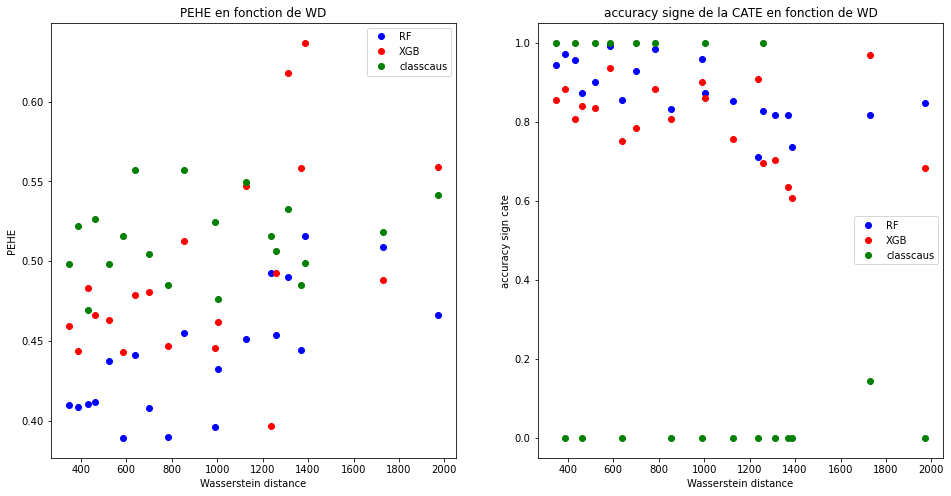

In [19]:
benchmarking_graph_classcaus(nbr_model= 2, weight= True, function_type="interaction", coef_tt=1, coef_tt_const=False)

#### 2 modèles avec poids  <a class="anchor" id="intnc2modw"></a>

In [20]:
benchmarking_table_classcaus(function_type = "interaction", coef_tt = 1, coef_tt_const = False)

0:	[0s / 0s],		train_loss: 0.6999,	train_loss_classif: 0.6983,	train_loss_wass: 0.1586
1:	[0s / 0s],		train_loss: 0.6735,	train_loss_classif: 0.6721,	train_loss_wass: 0.1393
2:	[0s / 0s],		train_loss: 0.6333,	train_loss_classif: 0.6317,	train_loss_wass: 0.1650
3:	[0s / 0s],		train_loss: 0.5940,	train_loss_classif: 0.5922,	train_loss_wass: 0.1841
4:	[0s / 0s],		train_loss: 0.5666,	train_loss_classif: 0.5645,	train_loss_wass: 0.2047
5:	[0s / 0s],		train_loss: 0.5226,	train_loss_classif: 0.5203,	train_loss_wass: 0.2341
6:	[0s / 0s],		train_loss: 0.4729,	train_loss_classif: 0.4701,	train_loss_wass: 0.2751
Pour WD = 372.7791442871094 (wd_para = 0.0) 

Pour 1 modèle sans poids
           accu_0  accu_1    MSE_p0    MSE_p1      PEHE  accu_sign_cate
RF          0.648   0.880  0.175736  0.066074  0.415233           0.988
xgb         0.648   0.868  0.173102  0.072156  0.436873           0.928
classcaus   0.464   0.120  0.205948  0.233529  0.521120           0.000 

0:	[0s / 0s],		train_loss: 0.6

#### Comparaison  <a class="anchor" id="intncbench"></a>

# Non linéaire   <a class="anchor" id="nlineaire"></a>

## $Y_i \sim \mathcal{B}(\Pi (s(X) + \gamma t ))$  avec  $s(X) =  \sum_{j=1}^{p-1} \sin(X_j \times X_{j+1}) $

### $ \gamma = std(s(X))$   <a class="anchor" id="nlnconstant"></a>

In [21]:
def f1(features):
    nbr_individuals = features.shape[0]
    nbr_features = features.shape[1]
    s_x = []
    for i in range(nbr_individuals):
        s_xi = 0
        for j in range(nbr_features-1):
            s_xi = s_xi + np.sin(features[i,j] * features[i,j+1])
        s_xi = 1 * s_xi
        s_x.append(s_xi)
    return s_x

0:	[0s / 0s],		train_loss: 0.6806,	train_loss_classif: 0.6789,	train_loss_wass: 0.1636
1:	[0s / 0s],		train_loss: 0.6629,	train_loss_classif: 0.6616,	train_loss_wass: 0.1337
2:	[0s / 0s],		train_loss: 0.6395,	train_loss_classif: 0.6382,	train_loss_wass: 0.1267
3:	[0s / 0s],		train_loss: 0.6264,	train_loss_classif: 0.6250,	train_loss_wass: 0.1408
4:	[0s / 0s],		train_loss: 0.6177,	train_loss_classif: 0.6164,	train_loss_wass: 0.1315
5:	[0s / 0s],		train_loss: 0.6071,	train_loss_classif: 0.6057,	train_loss_wass: 0.1338
6:	[0s / 0s],		train_loss: 0.5976,	train_loss_classif: 0.5960,	train_loss_wass: 0.1636
0:	[0s / 0s],		train_loss: 0.7102,	train_loss_classif: 0.7091,	train_loss_wass: 0.1094
1:	[0s / 0s],		train_loss: 0.6853,	train_loss_classif: 0.6843,	train_loss_wass: 0.1008
2:	[0s / 0s],		train_loss: 0.6542,	train_loss_classif: 0.6531,	train_loss_wass: 0.1060
3:	[0s / 0s],		train_loss: 0.6193,	train_loss_classif: 0.6183,	train_loss_wass: 0.1035
4:	[0s / 0s],		train_loss: 0.6101,	train_lo

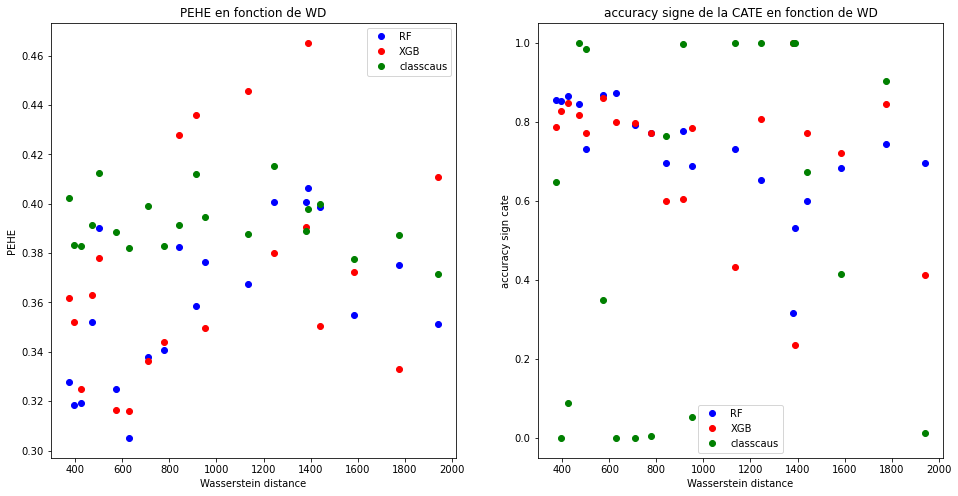

In [22]:
benchmarking_graph_classcaus(nbr_model= 1, weight= False, function_type="non-linear", coef_tt=1, coef_tt_const=False, function=f1)

#### 1 modèle sans poids  <a class="anchor" id="nlnc1mod"></a>

0:	[0s / 0s],		train_loss: 0.6980,	train_loss_classif: 0.6959,	train_loss_wass: 0.2159
1:	[0s / 0s],		train_loss: 0.6744,	train_loss_classif: 0.6722,	train_loss_wass: 0.2126
2:	[0s / 0s],		train_loss: 0.6478,	train_loss_classif: 0.6456,	train_loss_wass: 0.2132
3:	[0s / 0s],		train_loss: 0.6417,	train_loss_classif: 0.6397,	train_loss_wass: 0.2064
4:	[0s / 0s],		train_loss: 0.6300,	train_loss_classif: 0.6282,	train_loss_wass: 0.1887
5:	[0s / 0s],		train_loss: 0.6203,	train_loss_classif: 0.6183,	train_loss_wass: 0.1938
6:	[0s / 0s],		train_loss: 0.6064,	train_loss_classif: 0.6044,	train_loss_wass: 0.1957
0:	[0s / 0s],		train_loss: 0.7072,	train_loss_classif: 0.7058,	train_loss_wass: 0.1389
1:	[0s / 0s],		train_loss: 0.6848,	train_loss_classif: 0.6834,	train_loss_wass: 0.1375
2:	[0s / 0s],		train_loss: 0.6622,	train_loss_classif: 0.6605,	train_loss_wass: 0.1652
3:	[0s / 0s],		train_loss: 0.6258,	train_loss_classif: 0.6238,	train_loss_wass: 0.1999
4:	[0s / 0s],		train_loss: 0.6185,	train_lo

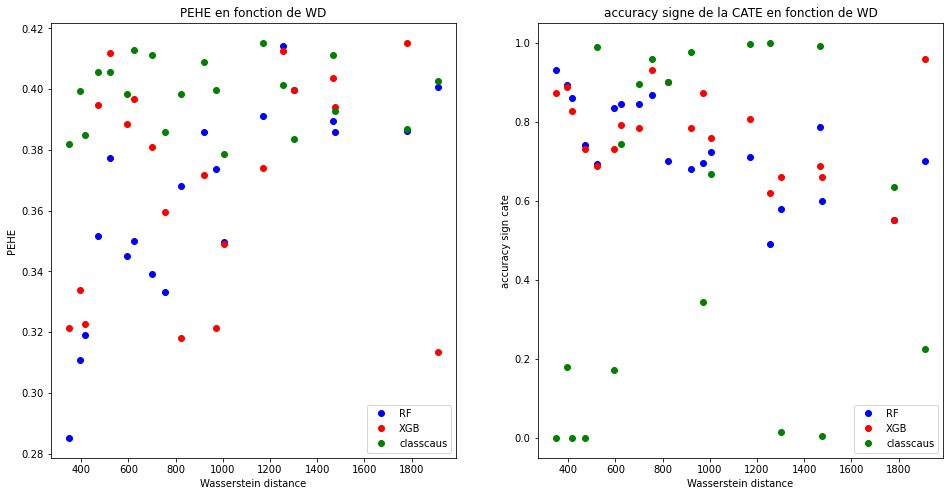

In [23]:
benchmarking_graph_classcaus(nbr_model= 1, weight= True, function_type="non-linear", coef_tt=1, coef_tt_const=False, function=f1)

#### 1 modèle avec poids  <a class="anchor" id="nlnc1modw"></a>

0:	[0s / 0s],		train_loss: 0.7042,	train_loss_classif: 0.6916,	train_loss_wass: 1.2544
1:	[0s / 0s],		train_loss: 0.7022,	train_loss_classif: 0.6914,	train_loss_wass: 1.0814
2:	[0s / 0s],		train_loss: 0.7006,	train_loss_classif: 0.6912,	train_loss_wass: 0.9366
3:	[0s / 0s],		train_loss: 0.6993,	train_loss_classif: 0.6911,	train_loss_wass: 0.8162
4:	[0s / 0s],		train_loss: 0.6981,	train_loss_classif: 0.6909,	train_loss_wass: 0.7155
5:	[0s / 0s],		train_loss: 0.6970,	train_loss_classif: 0.6907,	train_loss_wass: 0.6320
6:	[0s / 0s],		train_loss: 0.6961,	train_loss_classif: 0.6904,	train_loss_wass: 0.5633
0:	[0s / 0s],		train_loss: 0.6703,	train_loss_classif: 0.6591,	train_loss_wass: 1.1191
1:	[0s / 0s],		train_loss: 0.6607,	train_loss_classif: 0.6510,	train_loss_wass: 0.9725
2:	[0s / 0s],		train_loss: 0.6518,	train_loss_classif: 0.6433,	train_loss_wass: 0.8503
3:	[0s / 0s],		train_loss: 0.6435,	train_loss_classif: 0.6360,	train_loss_wass: 0.7506
4:	[0s / 0s],		train_loss: 0.6357,	train_lo

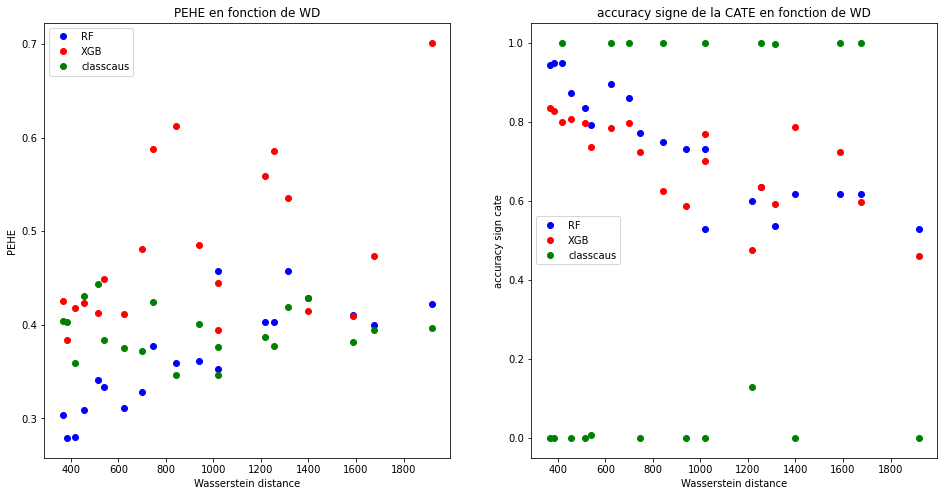

In [24]:
benchmarking_graph_classcaus(nbr_model= 2, weight= True, function_type="non-linear", coef_tt=1, coef_tt_const=False, function=f1)

#### 2 modèles avec poids  <a class="anchor" id="nlnc2modw"></a>

In [25]:
benchmarking_table_classcaus(function_type = "non-linear", coef_tt = 1, coef_tt_const = False, function=f1)

0:	[0s / 0s],		train_loss: 0.6932,	train_loss_classif: 0.6908,	train_loss_wass: 0.2432
1:	[0s / 0s],		train_loss: 0.6591,	train_loss_classif: 0.6568,	train_loss_wass: 0.2352
2:	[0s / 0s],		train_loss: 0.6192,	train_loss_classif: 0.6166,	train_loss_wass: 0.2627
3:	[0s / 0s],		train_loss: 0.6094,	train_loss_classif: 0.6064,	train_loss_wass: 0.2965
4:	[0s / 0s],		train_loss: 0.5966,	train_loss_classif: 0.5939,	train_loss_wass: 0.2652
5:	[0s / 0s],		train_loss: 0.5903,	train_loss_classif: 0.5875,	train_loss_wass: 0.2729
6:	[0s / 0s],		train_loss: 0.5765,	train_loss_classif: 0.5740,	train_loss_wass: 0.2441
Pour WD = 351.65875244140625 (wd_para = 0.0) 

Pour 1 modèle sans poids
           accu_0  accu_1    MSE_p0    MSE_p1      PEHE  accu_sign_cate
RF          0.436   0.732  0.165428  0.109377  0.326299           0.844
xgb         0.464   0.704  0.202652  0.128127  0.347986           0.856
classcaus   0.512   0.236  0.147741  0.177443  0.411765           0.008 

0:	[0s / 0s],		train_loss: 0.

#### Comparaison  <a class="anchor" id="nlncbench"></a>

## $Y_i \sim \mathcal{B}(\Pi (s(X_i) + \gamma t ))$  avec  $s(X_i) = 10 \sin ( X_i \beta )$ et $\Pi(x) = \frac{\arctan(x) + \frac{\pi}{2}  }{\pi}$

### $ \gamma = std(s(X))$

In [26]:
def f2(features):
    s_x = 10*np.sin(features.dot(param_sim["beta"]))
    return s_x

In [27]:
def pi2(xi):
    s_xi = (np.arctan(xi) + np.pi/2)/np.pi
    return s_xi

0:	[0s / 0s],		train_loss: 0.6896,	train_loss_classif: 0.6883,	train_loss_wass: 0.1220
1:	[0s / 0s],		train_loss: 0.6733,	train_loss_classif: 0.6723,	train_loss_wass: 0.0963
2:	[0s / 0s],		train_loss: 0.6542,	train_loss_classif: 0.6533,	train_loss_wass: 0.0925
3:	[0s / 0s],		train_loss: 0.6489,	train_loss_classif: 0.6477,	train_loss_wass: 0.1216
4:	[0s / 0s],		train_loss: 0.6432,	train_loss_classif: 0.6421,	train_loss_wass: 0.1074
5:	[0s / 0s],		train_loss: 0.6387,	train_loss_classif: 0.6378,	train_loss_wass: 0.0974
6:	[0s / 0s],		train_loss: 0.6351,	train_loss_classif: 0.6342,	train_loss_wass: 0.0929
0:	[0s / 0s],		train_loss: 0.6797,	train_loss_classif: 0.6765,	train_loss_wass: 0.3119
1:	[0s / 0s],		train_loss: 0.6632,	train_loss_classif: 0.6604,	train_loss_wass: 0.2803
2:	[0s / 0s],		train_loss: 0.6449,	train_loss_classif: 0.6423,	train_loss_wass: 0.2587
3:	[0s / 0s],		train_loss: 0.6277,	train_loss_classif: 0.6249,	train_loss_wass: 0.2793
4:	[0s / 0s],		train_loss: 0.6259,	train_lo

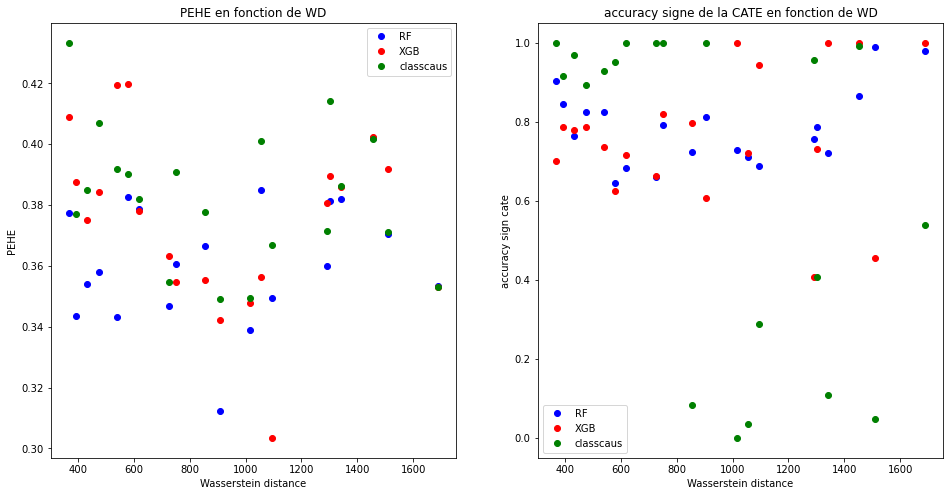

In [28]:
benchmarking_graph_classcaus(nbr_model= 1, weight= False, function_type="non-linear", coef_tt=1,
                             coef_tt_const=False, function=f2, pi=pi2)

#### 1 modèle sans poids

0:	[0s / 0s],		train_loss: 0.6804,	train_loss_classif: 0.6790,	train_loss_wass: 0.1403
1:	[0s / 0s],		train_loss: 0.6668,	train_loss_classif: 0.6656,	train_loss_wass: 0.1159
2:	[0s / 0s],		train_loss: 0.6494,	train_loss_classif: 0.6485,	train_loss_wass: 0.0905
3:	[0s / 0s],		train_loss: 0.6296,	train_loss_classif: 0.6287,	train_loss_wass: 0.0972
4:	[0s / 0s],		train_loss: 0.6131,	train_loss_classif: 0.6120,	train_loss_wass: 0.1100
5:	[0s / 0s],		train_loss: 0.6087,	train_loss_classif: 0.6075,	train_loss_wass: 0.1173
6:	[0s / 0s],		train_loss: 0.6068,	train_loss_classif: 0.6053,	train_loss_wass: 0.1544
0:	[0s / 0s],		train_loss: 0.6960,	train_loss_classif: 0.6929,	train_loss_wass: 0.3100
1:	[0s / 0s],		train_loss: 0.6820,	train_loss_classif: 0.6799,	train_loss_wass: 0.2097
2:	[0s / 0s],		train_loss: 0.6690,	train_loss_classif: 0.6672,	train_loss_wass: 0.1859
3:	[0s / 0s],		train_loss: 0.6534,	train_loss_classif: 0.6515,	train_loss_wass: 0.1908
4:	[0s / 0s],		train_loss: 0.6475,	train_lo

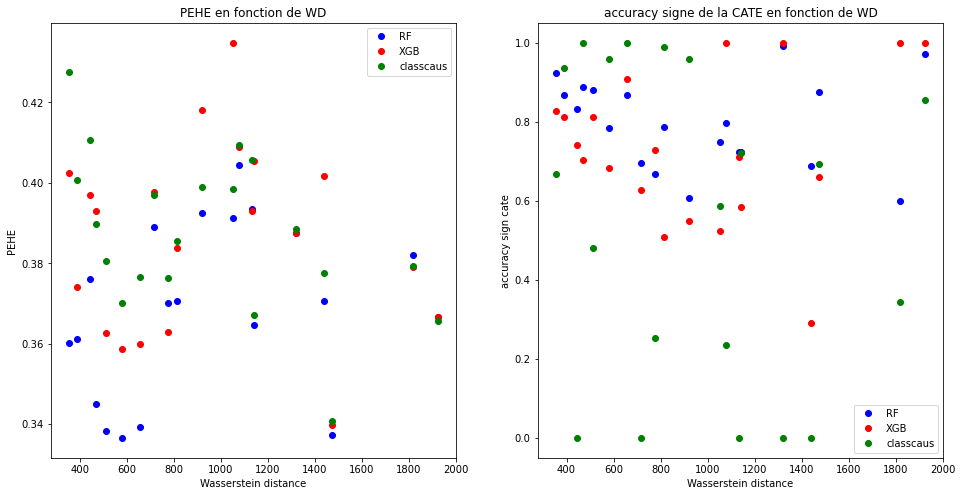

In [29]:
benchmarking_graph_classcaus(nbr_model= 1, weight= True, function_type="non-linear", coef_tt=1,
                             coef_tt_const=False, function=f2, pi=pi2)

#### 1 modèle avec poids

0:	[0s / 0s],		train_loss: 0.7011,	train_loss_classif: 0.6931,	train_loss_wass: 0.8000
1:	[0s / 0s],		train_loss: 0.6994,	train_loss_classif: 0.6927,	train_loss_wass: 0.6676
2:	[0s / 0s],		train_loss: 0.6980,	train_loss_classif: 0.6924,	train_loss_wass: 0.5633
3:	[0s / 0s],		train_loss: 0.6970,	train_loss_classif: 0.6921,	train_loss_wass: 0.4823
4:	[0s / 0s],		train_loss: 0.6961,	train_loss_classif: 0.6919,	train_loss_wass: 0.4201
5:	[0s / 0s],		train_loss: 0.6953,	train_loss_classif: 0.6916,	train_loss_wass: 0.3720
6:	[0s / 0s],		train_loss: 0.6945,	train_loss_classif: 0.6912,	train_loss_wass: 0.3348
0:	[0s / 0s],		train_loss: 0.6950,	train_loss_classif: 0.6886,	train_loss_wass: 0.6365
1:	[0s / 0s],		train_loss: 0.6879,	train_loss_classif: 0.6823,	train_loss_wass: 0.5620
2:	[0s / 0s],		train_loss: 0.6817,	train_loss_classif: 0.6767,	train_loss_wass: 0.4983
3:	[0s / 0s],		train_loss: 0.6760,	train_loss_classif: 0.6715,	train_loss_wass: 0.4445
4:	[0s / 0s],		train_loss: 0.6707,	train_lo

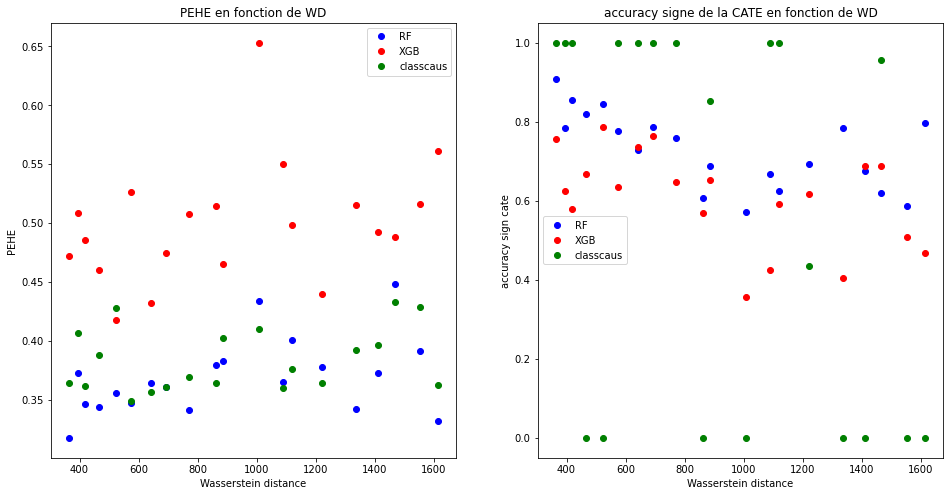

In [30]:
benchmarking_graph_classcaus(nbr_model= 2, weight= True, function_type="non-linear", coef_tt=1,
                             coef_tt_const=False, function=f2, pi=pi2)

#### 2 modèle avec poids

In [31]:
benchmarking_table_classcaus(function_type = "non-linear", coef_tt = 1,
                             coef_tt_const = False, function=f2, pi=pi2)

0:	[0s / 0s],		train_loss: 0.6895,	train_loss_classif: 0.6886,	train_loss_wass: 0.0913
1:	[0s / 0s],		train_loss: 0.6733,	train_loss_classif: 0.6725,	train_loss_wass: 0.0773
2:	[0s / 0s],		train_loss: 0.6557,	train_loss_classif: 0.6551,	train_loss_wass: 0.0683
3:	[0s / 0s],		train_loss: 0.6399,	train_loss_classif: 0.6391,	train_loss_wass: 0.0741
4:	[0s / 0s],		train_loss: 0.6300,	train_loss_classif: 0.6293,	train_loss_wass: 0.0712
5:	[0s / 0s],		train_loss: 0.6200,	train_loss_classif: 0.6191,	train_loss_wass: 0.0884
6:	[0s / 0s],		train_loss: 0.6108,	train_loss_classif: 0.6100,	train_loss_wass: 0.0792
Pour WD = 360.789306640625 (wd_para = 0.0) 

Pour 1 modèle sans poids
           accu_0  accu_1    MSE_p0    MSE_p1      PEHE  accu_sign_cate
RF          0.496   0.736  0.234106  0.157880  0.361516           0.940
xgb         0.512   0.716  0.257394  0.167792  0.399724           0.892
classcaus   0.504   0.236  0.220348  0.199277  0.408141           0.928 

0:	[0s / 0s],		train_loss: 0.70

#### Comparaison